In [25]:
from qiskit import QuantumCircuit, Aer, transpile


def digital_alive(state : bool, neighbors : list[bool]):
    """Returns whether a cell is alive in the next generation."""
    return (state and sum(neighbors) in [2, 3]) or (not state and sum(neighbors) == 3)

def quantum_alive(state : bool, neighbors : list[bool]):
    """Returns whether a cell is alive in the next generation."""
    ## init circuit
    qc = QuantumCircuit(14, 1)
    qc.x(0) if state else qc.id(0)
    qc.x([i + 1 for i in range(len(neighbors)) if neighbors[i]])

    """ 
        TODO:
        1. Do the addition of the neighbors
        2. Make a decision based on the result of the addition
        3. Measure the output qubit
    """

    # Random stuff for the time begin
    for i in range(1, 9):
        qc.ccx(0, i, 9)  

    qc.measure(9, 0)
    result = Aer.get_backend('qasm_simulator').run(transpile(qc, Aer.get_backend('qasm_simulator'))).result()
    print(result.get_counts())
    
    ones = result.get_counts().get('1', 0)
    zeros = result.get_counts().get('0', 0)

    return ones > zeros

In [26]:
%matplotlib inline

In [31]:
state = False
neighbors = [True, False, True, True, False, False, True, True]


print("Digital: ", digital_alive(state, neighbors))
print("Quantum: ", quantum_alive(state, neighbors))

Digital:  False
{'0': 1024}
Quantum:  False


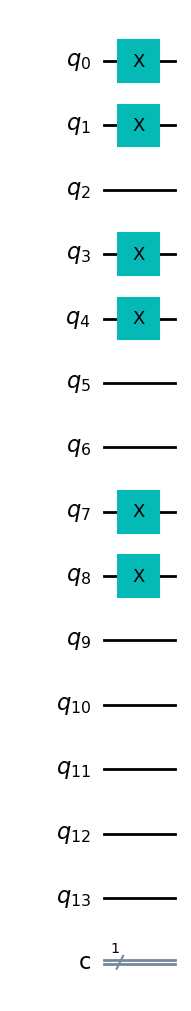

In [32]:
state = True
neighbors = [True, False, True, True, False, False, True, True]

qc = QuantumCircuit(14, 1)
qc.x(0) if state else qc.id(0)
qc.x([i + 1 for i in range(len(neighbors)) if neighbors[i]])
qc.draw('mpl')

{'1': 517, '0': 507}


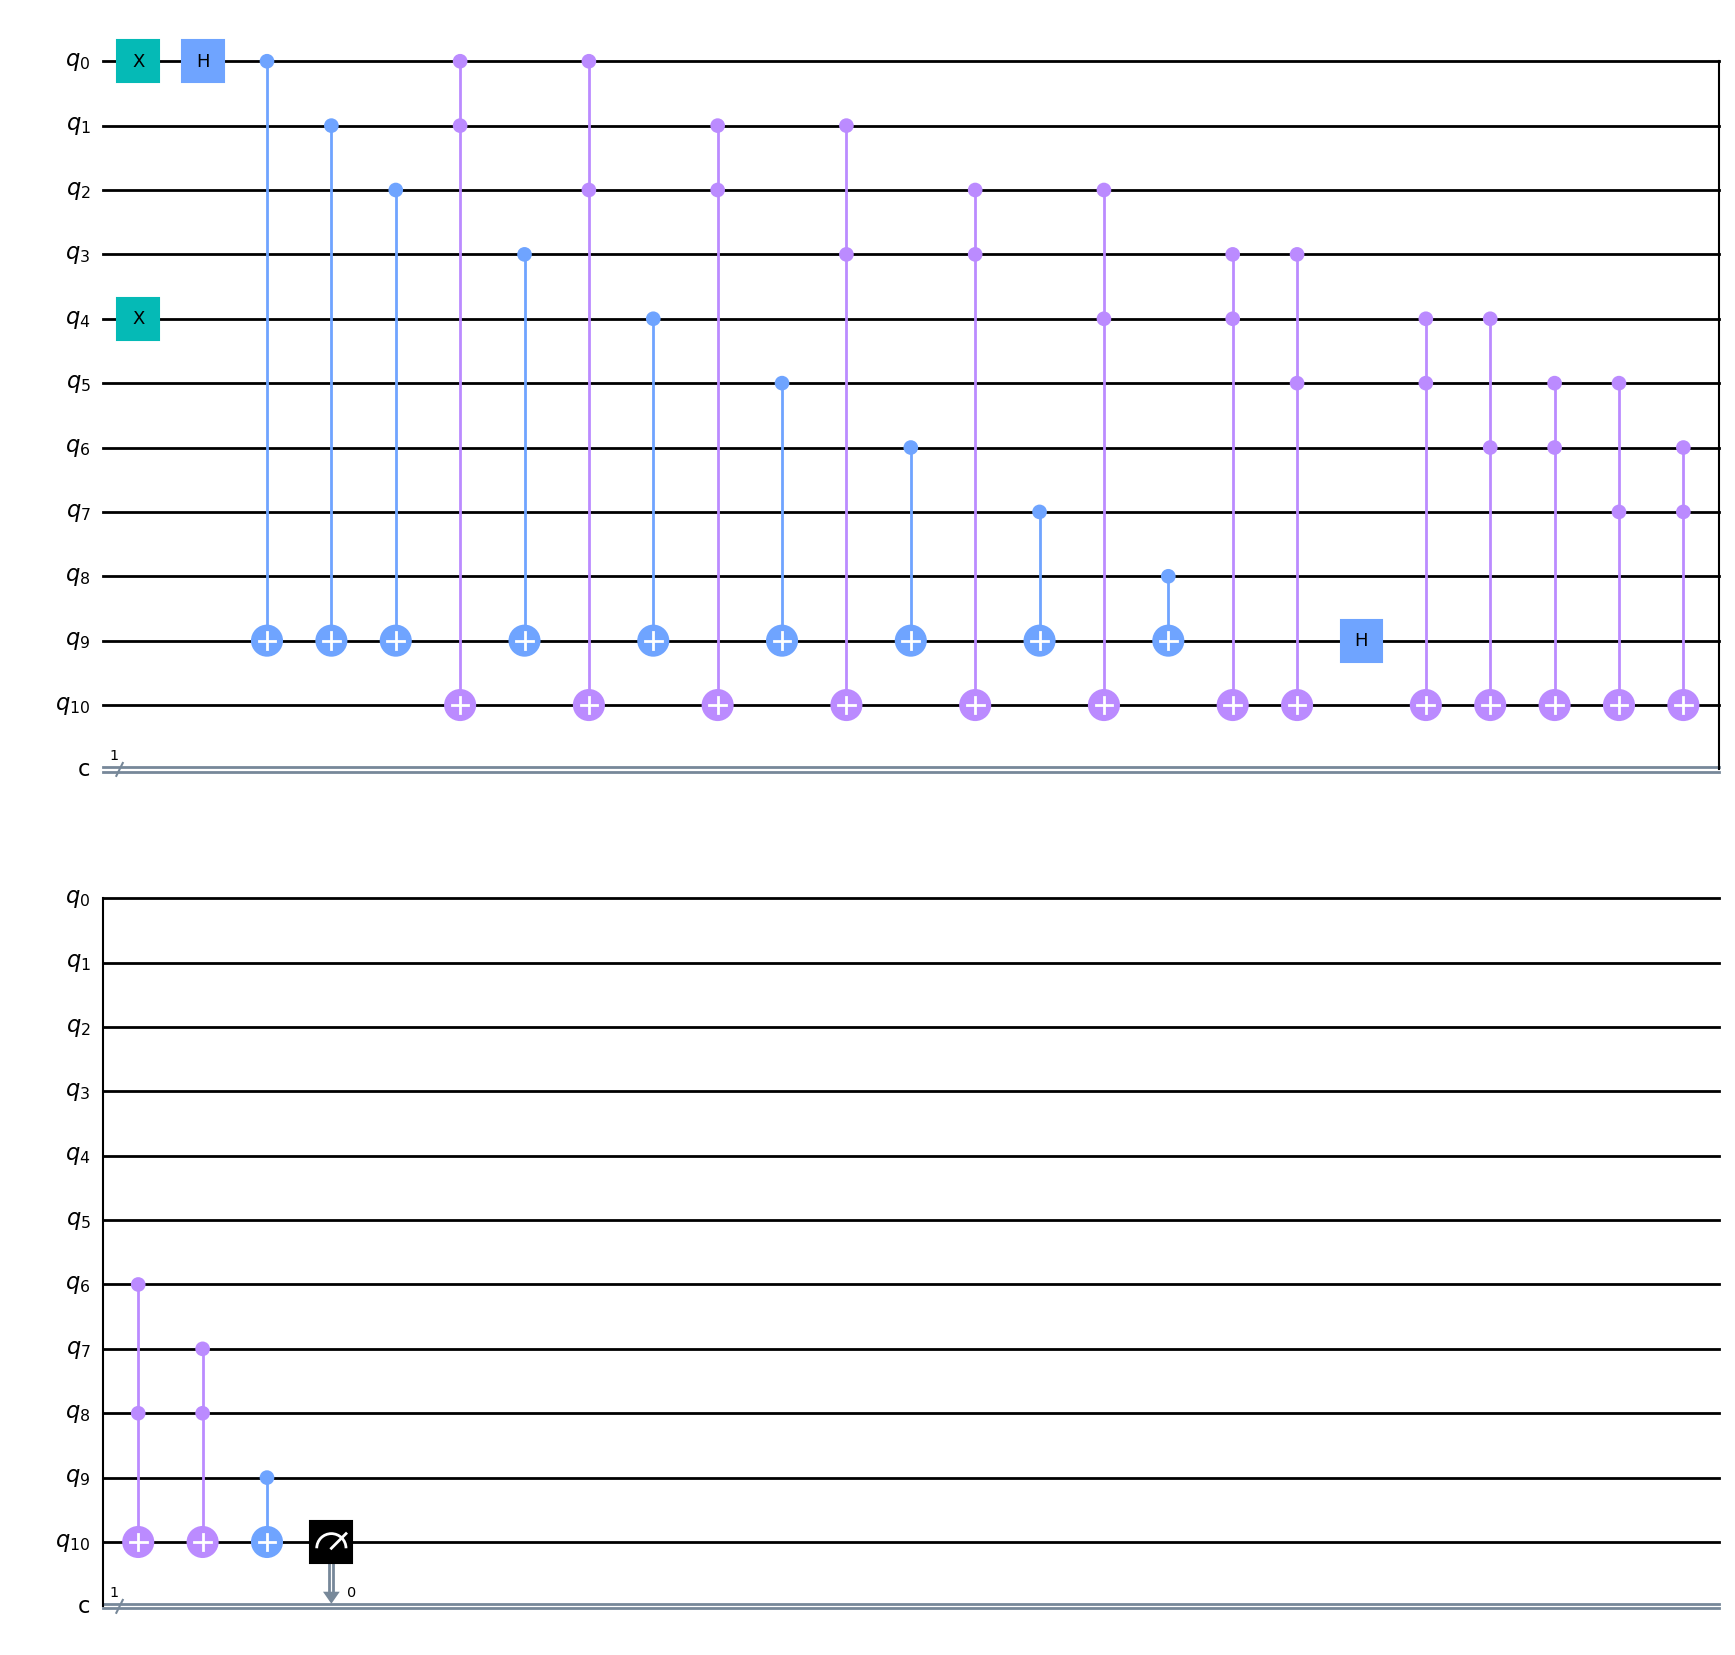

In [46]:

import numpy as np
x, y = 0, 0
board = np.array([[True, False, True], [False, True, False], [True, False, True]])


qc = QuantumCircuit(11, 1)
qc.x(0) if state else qc.id(0)
qc.x([i + 1 for i in range(len(neighbors)) if neighbors[i]])

qc.h(0)

for i in range(0, 9):
    qc.cx(i, 9)  

for i in range(0, 9):
    for j in range(i + 1, min(i +3, 9)):
        qc.ccx(i, j, 10)

qc.h(9)
qc.cx(9, 10)
qc.measure(10, 0)
result = Aer.get_backend('qasm_simulator').run(transpile(qc, Aer.get_backend('qasm_simulator'))).result()
print(result.get_counts())

ones = result.get_counts().get('1', 0)
zeros = result.get_counts().get('0', 0)

qc.draw('mpl')

